<a href="https://colab.research.google.com/github/KyleEtera/MAT422/blob/main/MAT422_Final_Project_Abalone_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/KyleEtera/MAT422/refs/heads/main/abalone.csv"

df_abalone = pd.read_csv(url)
print(df_abalone.head())

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [122]:
# Do we see any volumes that don't make sense?
df_bad_volume = (df_abalone["Length"] == 0) | (df_abalone["Diameter"] == 0) | (df_abalone["Height"] == 0)
print("Initial Dataset Size = ", len(df_abalone), "\nCheck for Bad Length, Diameter, Height (Count = ", len(df_abalone[df_bad_volume]), "):\n", df_abalone[df_bad_volume], "\n\n")
# df_abalone_c = df_abalone[(df_bad_volume) == False]
# print(df_abalone_c[df_abalone_c["Volume"] == 0])

# Do we see any weights that don't make sense?
df_bad_weight_1 = df_abalone["Whole weight"] < (df_abalone["Shucked weight"] + df_abalone["Viscera weight"] + df_abalone["Shell weight"])
df_bad_weight_2 = (df_abalone["Whole weight"] == 0) | (df_abalone["Shucked weight"] == 0) | (df_abalone["Viscera weight"] == 0) | (df_abalone["Shell weight"] == 0)
print("Check for Bad Weights (Count = ", len(df_abalone[(df_bad_weight_1 == True) | (df_bad_weight_2 == True)]), "):\n", df_abalone[(df_bad_weight_1 == True) | (df_bad_weight_2 == True)].head(), "\n\n")

# Create new copy of the dataset to clean up
df_abalone_c = df_abalone.copy()

# Clean up dataset and add columns
df_abalone_c = df_abalone_c[(df_bad_volume == False) & (df_bad_weight_1 == False) & (df_bad_weight_2 == False)]
df_abalone_c["Age"] = df_abalone_c["Rings"] + 1.5
df_abalone_c["Volume"] = 4 * np.pi * df_abalone_c["Length"] * df_abalone_c["Diameter"] * df_abalone_c["Height"] / 3

print("View Cleaned Up Data (Cleaned Size = ", len(df_abalone_c), "):\n", df_abalone_c.head())



Initial Dataset Size =  4177 
Check for Bad Length, Diameter, Height (Count =  2 ):
      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1257   I   0.430      0.34     0.0         0.428          0.2065   
3996   I   0.315      0.23     0.0         0.134          0.0575   

      Viscera weight  Shell weight  Rings  
1257          0.0860        0.1150      8  
3996          0.0285        0.3505      6   


Check for Bad Weights (Count =  155 ):
    Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
42   I   0.240     0.175   0.045        0.0700          0.0315   
43   I   0.205     0.150   0.055        0.0420          0.0255   
44   I   0.210     0.150   0.050        0.0420          0.0175   
45   I   0.390     0.295   0.095        0.2030          0.0875   
46   M   0.470     0.370   0.120        0.5795          0.2930   

    Viscera weight  Shell weight  Rings  
42          0.0235         0.020      5  
43          0.0150         0.012      5  
44          

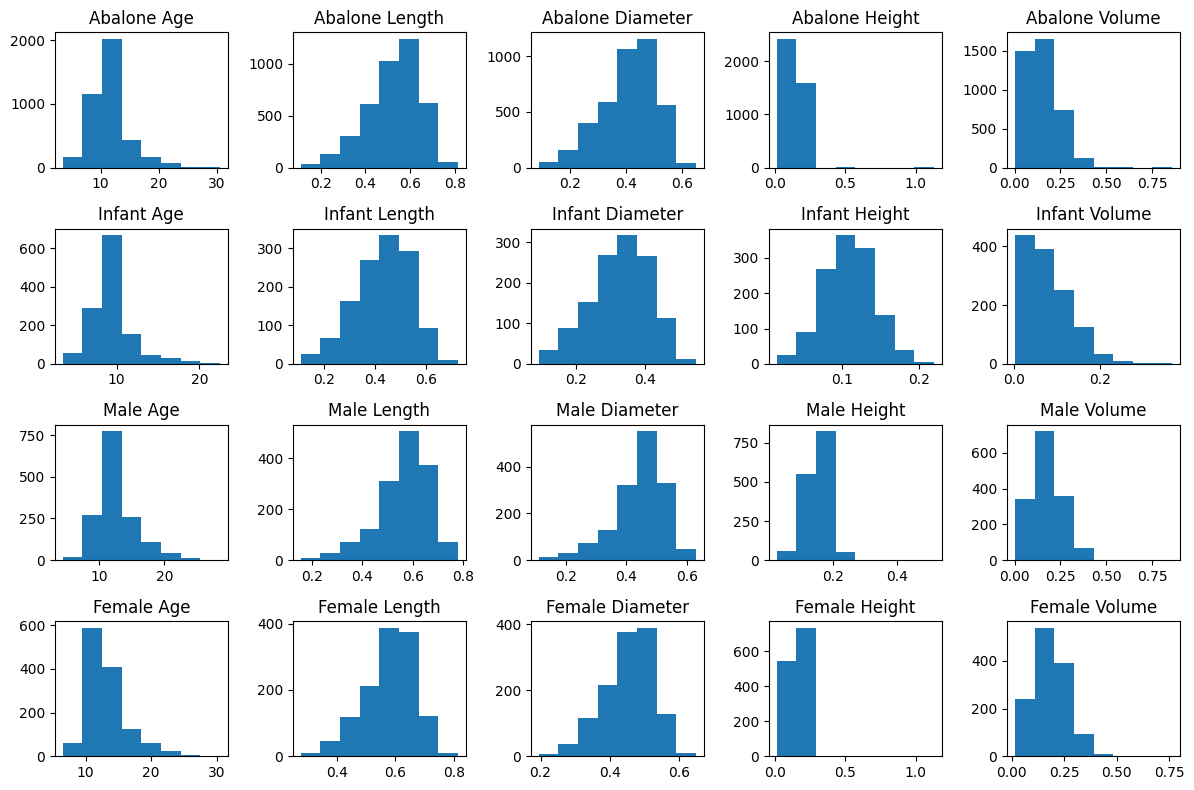

In [34]:
df_male = df_abalone_c[df_abalone_c["Sex"] == "M"]
df_female = df_abalone_c[df_abalone_c["Sex"] == "F"]
df_infant = df_abalone_c[df_abalone_c["Sex"] == "I"]

variables = ["Age", "Length", "Diameter", "Height", "Volume"]
nrow = 4
ncol = len(variables)

fig, axs = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_size_inches(12, 8)

for i in range(ncol):
    axs[0, i].hist(df_abalone_c[variables[i]], bins = 8)
    axs[0, i].set_title("Abalone " + variables[i])

    axs[1, i].hist(df_infant[variables[i]], bins = 8)
    axs[1, i].set_title("Infant " + variables[i])

    axs[2, i].hist(df_male[variables[i]], bins = 8)
    axs[2, i].set_title("Male " + variables[i])

    axs[3, i].hist(df_female[variables[i]], bins = 8)
    axs[3, i].set_title("Female " + variables[i])

fig.tight_layout()
plt.show()

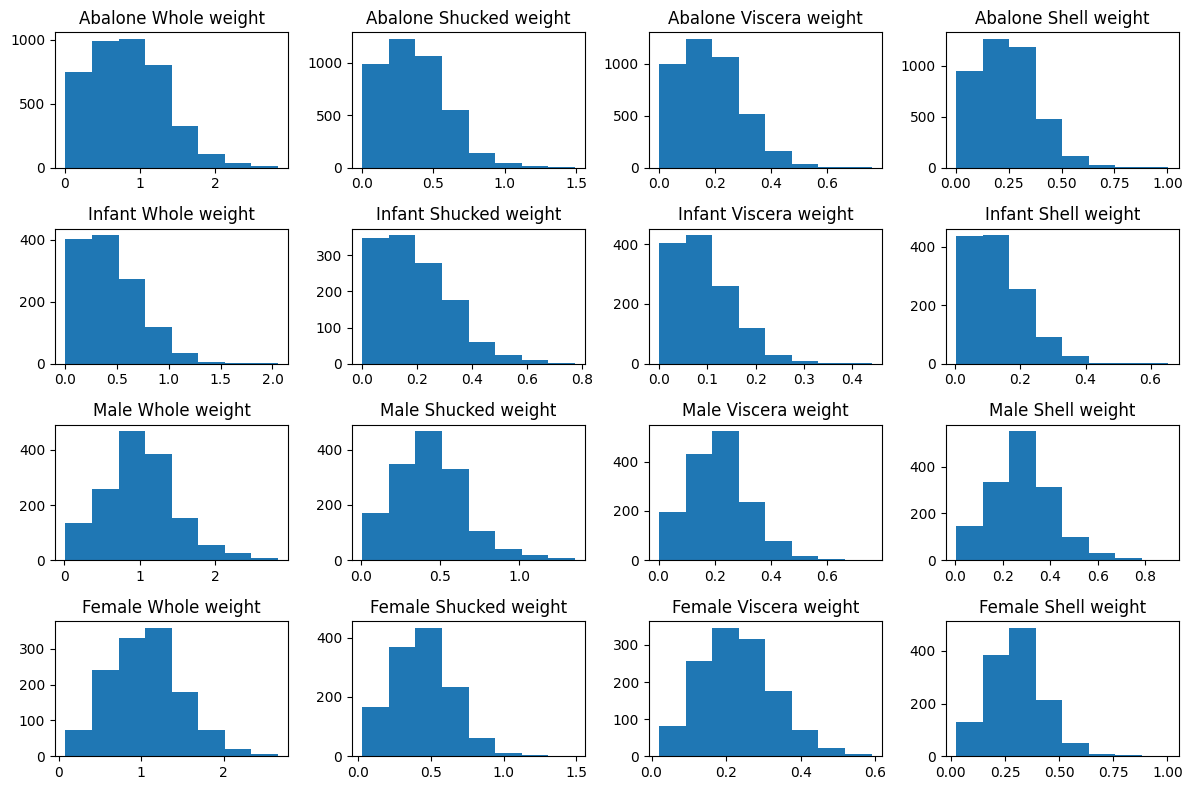

In [ ]:
variables = ["Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]
ncol = ncol = len(variables)

fig, axs = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_size_inches(12, 8)

for i in range(ncol):
    axs[0, i].hist(df_abalone_c[variables[i]], bins = 8)
    axs[0, i].set_title("Abalone " + variables[i])

    axs[1, i].hist(df_infant[variables[i]], bins = 8)
    axs[1, i].set_title("Infant " + variables[i])

    axs[2, i].hist(df_male[variables[i]], bins = 8)
    axs[2, i].set_title("Male " + variables[i])

    axs[3, i].hist(df_female[variables[i]], bins = 8)
    axs[3, i].set_title("Female " + variables[i])

fig.tight_layout()
plt.show()

In [123]:
def label_development(row):
  if row["Sex"] == "I":
    return "Infant"
  else:
    return "Adult"

print(df_abalone_c.head())

df_abalone_c["Development"] = df_abalone_c.apply(label_development, axis=1)
#print(df_abalone_c.head())

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings   Age    Volume  
0         0.150     15  16.5  0.066087  
1         0.070      7   8.5  0.034966  
2         0.210      9  10.5  0.125877  
3         0.155     10  11.5  0.084090  
4         0.055      7   8.5  0.028199  


In [124]:
df_abalone_c = df_abalone_c.drop(["Sex", "Shucked weight", "Viscera weight", "Shell weight", "Rings"], axis=1)

In [125]:
df_abalone_c = df_abalone_c[["Age", "Development", "Whole weight", "Volume", "Length", "Diameter", "Height"]]
print(df_abalone_c)

       Age Development  Whole weight    Volume  Length  Diameter  Height
0     16.5       Adult        0.5140  0.066087   0.455     0.365   0.095
1      8.5       Adult        0.2255  0.034966   0.350     0.265   0.090
2     10.5       Adult        0.6770  0.125877   0.530     0.420   0.135
3     11.5       Adult        0.5160  0.084090   0.440     0.365   0.125
4      8.5      Infant        0.2050  0.028199   0.330     0.255   0.080
...    ...         ...           ...       ...     ...       ...     ...
4172  12.5       Adult        0.8870  0.175725   0.565     0.450   0.165
4173  11.5       Adult        0.9660  0.146800   0.590     0.440   0.135
4174  10.5       Adult        1.1760  0.244730   0.600     0.475   0.205
4175  11.5       Adult        1.0945  0.190459   0.625     0.485   0.150
4176  13.5       Adult        1.9485  0.321866   0.710     0.555   0.195

[4021 rows x 7 columns]


In [126]:
df_abalone_c = df_abalone_c[df_abalone_c["Height"] <= 0.23]
print(df_abalone_c)
df_abalone_c = df_abalone_c[df_abalone_c["Height"] >= 0.03]
print(df_abalone_c)
df_abalone_c = df_abalone_c[df_abalone_c["Whole weight"] <= 2.3]
print(df_abalone_c)
df_abalone_c = df_abalone_c[df_abalone_c["Age"] <= 23]
print(df_abalone_c)

       Age Development  Whole weight    Volume  Length  Diameter  Height
0     16.5       Adult        0.5140  0.066087   0.455     0.365   0.095
1      8.5       Adult        0.2255  0.034966   0.350     0.265   0.090
2     10.5       Adult        0.6770  0.125877   0.530     0.420   0.135
3     11.5       Adult        0.5160  0.084090   0.440     0.365   0.125
4      8.5      Infant        0.2050  0.028199   0.330     0.255   0.080
...    ...         ...           ...       ...     ...       ...     ...
4172  12.5       Adult        0.8870  0.175725   0.565     0.450   0.165
4173  11.5       Adult        0.9660  0.146800   0.590     0.440   0.135
4174  10.5       Adult        1.1760  0.244730   0.600     0.475   0.205
4175  11.5       Adult        1.0945  0.190459   0.625     0.485   0.150
4176  13.5       Adult        1.9485  0.321866   0.710     0.555   0.195

[4007 rows x 7 columns]
       Age Development  Whole weight    Volume  Length  Diameter  Height
0     16.5       Adult    

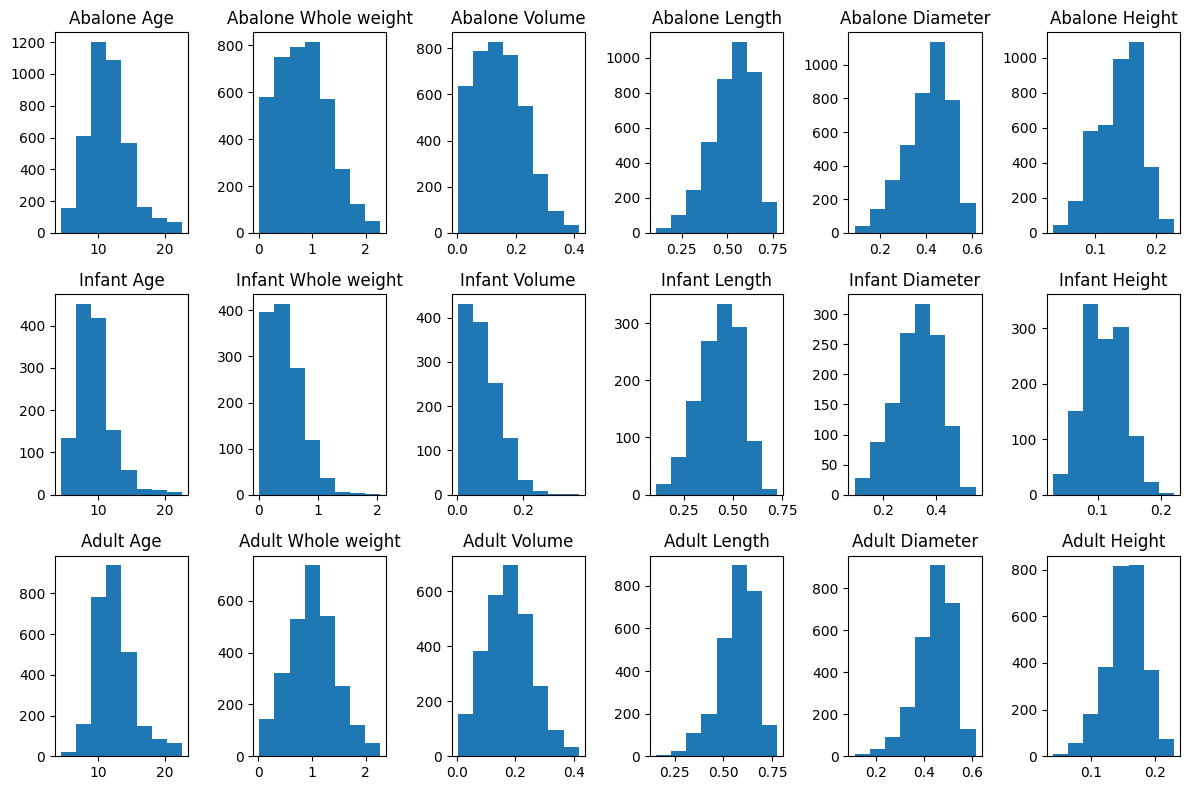

In [127]:
variables = ["Age", "Whole weight", "Volume", "Length", "Diameter", "Height"]
nrow = 3
ncol = len(variables)
df_abalone_infant = df_abalone_c[df_abalone_c["Development"] == "Infant"]
df_abalone_adult = df_abalone_c[df_abalone_c["Development"] == "Adult"]

fig, axs = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_size_inches(12, 8)

for i in range(ncol):
    axs[0, i].hist(df_abalone_c[variables[i]], bins = 8)
    axs[0, i].set_title("Abalone " + variables[i])

    axs[1, i].hist(df_abalone_infant[variables[i]], bins = 8)
    axs[1, i].set_title("Infant " + variables[i])

    axs[2, i].hist(df_abalone_adult[variables[i]], bins = 8)
    axs[2, i].set_title("Adult " + variables[i])

fig.tight_layout()
plt.show()

In [162]:
ages = [5, 10, 15, 20]

for i in range(len(ages)):
  weight = df_abalone_c[(df_abalone_c["Age"] >= ages[i]) & (df_abalone_c["Whole weight"] > 1)].shape[0] / df_abalone_c.shape[0]
  volume = df_abalone_c[(df_abalone_c["Age"] >= ages[i]) & (df_abalone_c["Volume"] > 0.2)].shape[0] / df_abalone_c.shape[0]
  length = df_abalone_c[(df_abalone_c["Age"] >= ages[i]) & (df_abalone_c["Length"] > 0.5)].shape[0] / df_abalone_c.shape[0]
  diameter = df_abalone_c[(df_abalone_c["Age"] >= ages[i]) & (df_abalone_c["Diameter"] > 0.5)].shape[0] / df_abalone_c.shape[0]
  height = df_abalone_c[(df_abalone_c["Age"] >= ages[i]) & (df_abalone_c["Height"] > 0.2)].shape[0] / df_abalone_c.shape[0]

  print("|Age:", ages[i], "|Weights:", np.round(weight * 100, 2), "%", "|Volumes:", np.round(volume * 100, 2), "%",
        "|Lengths:", np.round(length * 100, 2), "%", "|Diameters:", np.round(diameter * 100, 2), "%", "|Heights:", np.round(height * 100, 2), "%|")

|Age: 5 |Weights: 35.48 % |Volumes: 26.34 % |Lengths: 62.75 % |Diameters: 15.98 % |Heights: 3.01 %|
|Age: 10 |Weights: 33.46 % |Volumes: 25.48 % |Lengths: 54.29 % |Diameters: 15.63 % |Heights: 3.01 %|
|Age: 15 |Weights: 6.41 % |Volumes: 5.13 % |Lengths: 9.75 % |Diameters: 3.21 % |Heights: 1.06 %|
|Age: 20 |Weights: 1.19 % |Volumes: 0.88 % |Lengths: 1.67 % |Diameters: 0.66 % |Heights: 0.18 %|


In [164]:
print(df_abalone_c.describe())

               Age  Whole weight       Volume       Length     Diameter  \
count  3960.000000   3960.000000  3960.000000  3960.000000  3960.000000   
mean     11.419444      0.830282     0.145190     0.526199     0.409513   
std       3.048952      0.472539     0.084396     0.116233     0.096115   
min       4.500000      0.008000     0.001244     0.110000     0.090000   
25%       9.500000      0.452000     0.077363     0.455000     0.350000   
50%      11.500000      0.808000     0.139022     0.545000     0.425000   
75%      12.500000      1.151500     0.203255     0.615000     0.480000   
max      22.500000      2.273000     0.416073     0.775000     0.615000   

            Height  
count  3960.000000  
mean      0.139605  
std       0.036891  
min       0.030000  
25%       0.115000  
50%       0.145000  
75%       0.165000  
max       0.230000  


[0.94643016 0.02601849]


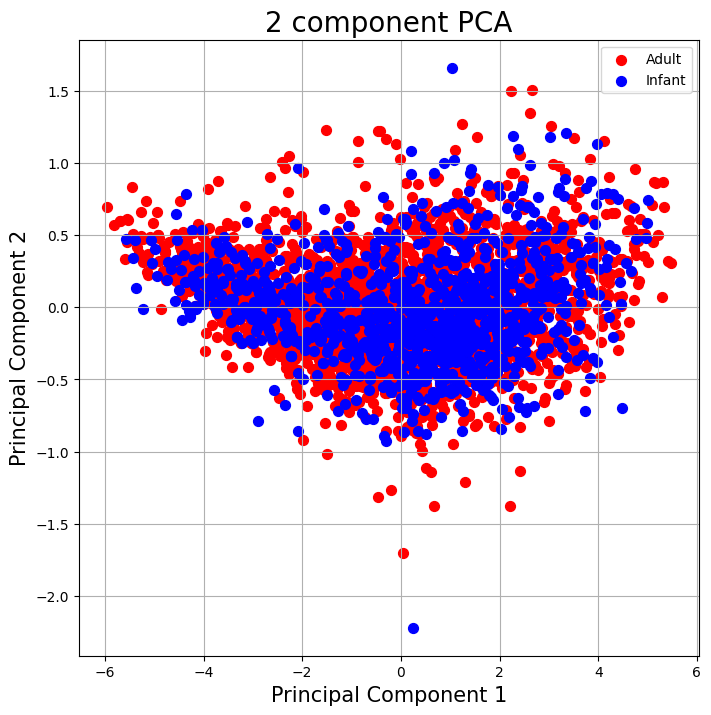

In [173]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_data_to_use = df_abalone_c.drop(["Age", "Development"], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_data_to_use)

pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
df_pca_data = pd.DataFrame(data=pca_data, columns=["PC1", "PC2"])
df_pca_final = pd.concat([df_pca_data, df_abalone_c[["Development"]]], axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["Adult", "Infant"]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca_final["Development"] == target
    ax.scatter(df_pca_final.loc[indicesToKeep, "PC1"]
               , df_pca_final.loc[indicesToKeep, "PC2"]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

print(pca.explained_variance_ratio_)

[0.90787315 0.03991891]


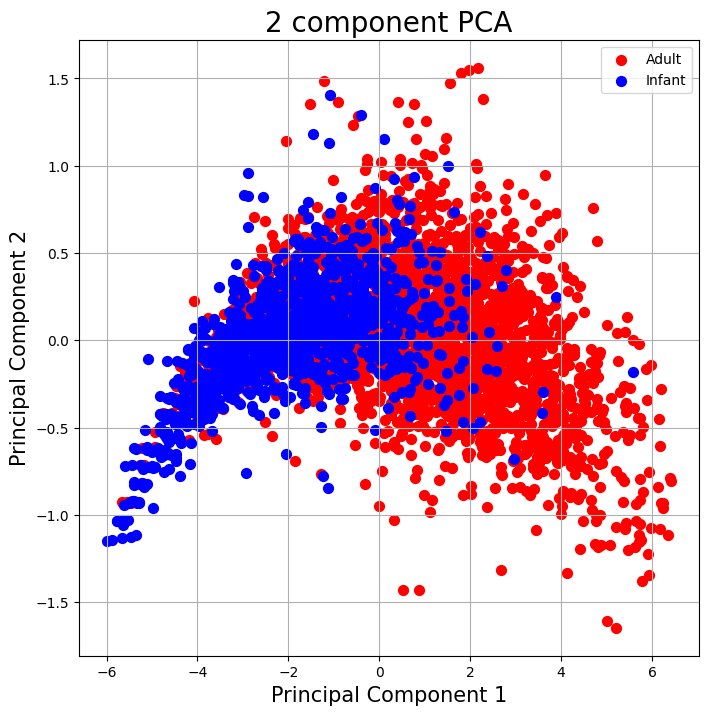

In [181]:
df_data_to_use = df_abalone.drop(["Rings", "Sex"], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_data_to_use)

pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
df_pca_data = pd.DataFrame(data=pca_data, columns=["PC1", "PC2"])
df_pca_final = pd.concat([df_pca_data, df_abalone_c[["Development"]]], axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
for target, color in zip(targets,colors):
    indicesToKeep = df_pca_final["Development"] == target
    ax.scatter(df_pca_final.loc[indicesToKeep, "PC1"]
               , df_pca_final.loc[indicesToKeep, "PC2"]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

print(pca.explained_variance_ratio_)

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_data_to_use = df_abalone_c.drop("Development", axis=1)
train, test, train_lbl, test_lbl = train_test_split(df_data_to_use, df_abalone_c["Development"], test_size = 0.15, random_state=0)

scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

pca.fit(train)

train = pca.transform(train)
test = pca.transform(test)

logReg = LogisticRegression(solver = 'lbfgs')
logReg.fit(train, train_lbl)

print(test[0:5], "\n", type(test_lbl[0:5]))
predictions = logReg.predict(test[0:5])
print(predictions)
score = logReg.score(test, test_lbl)
print("Accuracy: ", np.round(score * 100, 2), "%")

[[ 1.10879262 -0.33163123]
 [ 0.74675479  0.16858897]
 [-0.25369921 -0.2085799 ]
 [ 2.73008425  0.63833071]
 [ 3.68926238  2.60094157]] 
 <class 'pandas.core.series.Series'>
['Adult' 'Adult' 'Adult' 'Adult' 'Adult']
Accuracy:  76.43 %


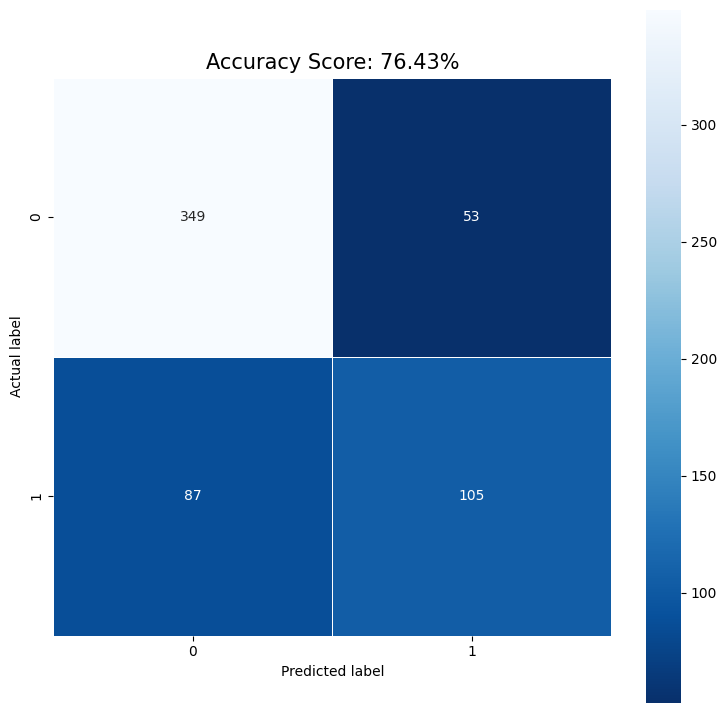

In [273]:
from sklearn import metrics
import seaborn as sns

predictions = logReg.predict(test)
conMatrix = metrics.confusion_matrix(test_lbl, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(conMatrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}%'.format(score * 100)
plt.title(all_sample_title, size = 15);

In [274]:
train, test, train_lbl, test_lbl = train_test_split(df_data_to_use, df_abalone_c["Development"], test_size = 0.15, random_state=0)

scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

logReg = LogisticRegression(solver = 'lbfgs')
logReg.fit(train, train_lbl)

print(test[0:5], "\n", test_lbl[0:5].shape)
predictions = logReg.predict(test[0:5])
print(predictions)
score = logReg.score(test, test_lbl)
print("Accuracy: ", np.round(score * 100, 2), "%")

[[ 0.02718339  0.60668715  0.39142219  0.62554819  0.67233027  0.27444956]
 [ 0.35513783 -0.00393335  0.26508822  0.36773073  0.46437587  0.40954714]
 [-0.30077105 -0.12160501 -0.23213743 -0.06196504 -0.10749871  0.13935199]
 [ 1.33900114  0.81658795  1.32718262  0.7974265   0.77630746  1.7605229 ]
 [ 3.6346822   1.92545782  1.15601327  1.18415269  0.93227326  0.94993744]] 
 (5,)
['Adult' 'Adult' 'Adult' 'Adult' 'Adult']
Accuracy:  79.8 %


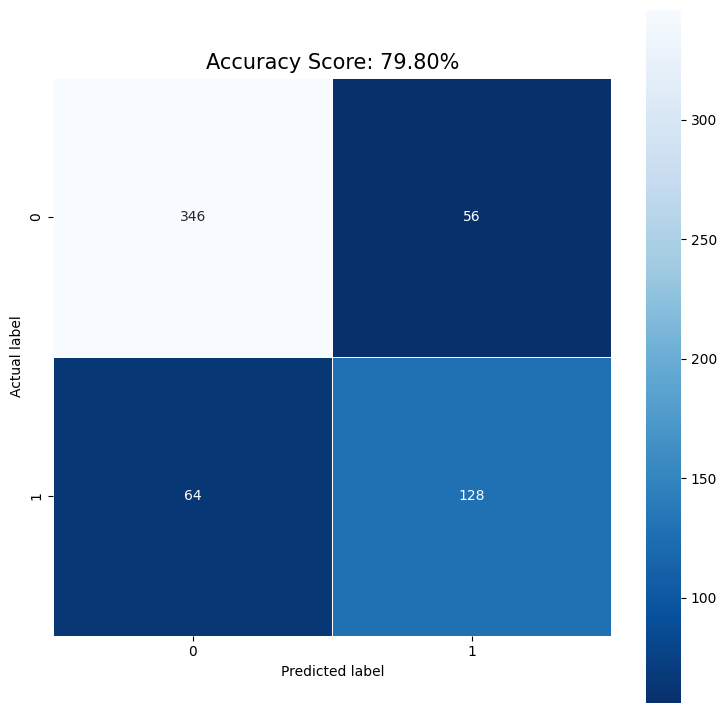

In [275]:
predictions = logReg.predict(test)
conMatrix = metrics.confusion_matrix(test_lbl, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(conMatrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}%'.format(score * 100)
plt.title(all_sample_title, size = 15);

In [324]:
from sklearn.linear_model import LinearRegression

df_data_to_use = df_abalone_c.drop(["Development", "Age"], axis=1)
train, test, train_lbl, test_lbl = train_test_split(df_data_to_use, df_abalone_c["Age"], test_size = 0.15, random_state=2)

linReg = LinearRegression()
linReg.fit(train, train_lbl)

print(test[0:5], "\n", test_lbl[0:5])
predictions = linReg.predict(test[0:5])
print(predictions)
score = linReg.score(test, test_lbl)
print("Accuracy: ", np.round(score * 100, 2), "%\nCoefficients: ", linReg.coef_)

      Whole weight    Volume  Length  Diameter  Height
2054        0.4955  0.077132   0.465     0.360   0.110
598         1.0540  0.181894   0.605     0.495   0.145
1817        1.5845  0.268640   0.685     0.535   0.175
599         0.9810  0.203550   0.560     0.445   0.195
3509        1.3345  0.245861   0.645     0.520   0.175 
 2054     8.5
598     13.5
1817    10.5
599     17.5
3509    11.5
Name: Age, dtype: float64
[10.23941424 12.27806365 12.98213897 13.89924505 13.16864962]
Accuracy:  43.97 %
Coefficients:  [  1.60529298 -20.4924444  -11.11684959  21.57605717  55.21416905]


In [334]:
df_data_to_use = df_abalone_c.drop(["Development", "Age", "Volume"], axis=1)
train, test, train_lbl, test_lbl = train_test_split(df_data_to_use, df_abalone_c["Age"], test_size = 0.15, random_state=2)

linReg = LinearRegression()
linReg.fit(train, train_lbl)

print(test[0:5], "\n", test_lbl[0:5])
predictions = linReg.predict(test[0:5])
print(predictions)
score = linReg.score(test, test_lbl)
print("Accuracy: ", np.round(score * 100, 2), "%\nCoefficients: ", linReg.coef_)

      Whole weight  Length  Diameter  Height
2054        0.4955   0.465     0.360   0.110
598         1.0540   0.605     0.495   0.145
1817        1.5845   0.685     0.535   0.175
599         0.9810   0.560     0.445   0.195
3509        1.3345   0.645     0.520   0.175 
 2054     8.5
598     13.5
1817    10.5
599     17.5
3509    11.5
Name: Age, dtype: float64
[10.1064894  12.29543444 13.12791466 13.87708061 13.40170459]
Accuracy:  42.42 %
Coefficients:  [ -0.6000536  -10.11372967  18.71817666  40.37266514]


In [326]:
df_data_to_use = df_abalone.drop(["Sex", "Rings"], axis=1)
train, test, train_lbl, test_lbl = train_test_split(df_data_to_use, df_abalone["Rings"], test_size = 0.15, random_state=0)

linReg = LinearRegression()
linReg.fit(train, train_lbl)

print(test[0:5], "\n", test_lbl[0:5] + 1.5)
predictions = linReg.predict(test[0:5])
print(predictions)
score = linReg.score(test, test_lbl)
print("Accuracy: ", np.round(score * 100, 2), "%\nCoefficients: ", linReg.coef_)

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
668    0.550     0.425   0.155        0.9175          0.2775          0.2430   
1580   0.500     0.400   0.120        0.6160          0.2610          0.1430   
3784   0.620     0.480   0.155        1.2555          0.5270          0.3740   
463    0.220     0.165   0.055        0.0545          0.0215          0.0120   
2615   0.645     0.500   0.175        1.5105          0.6735          0.3755   

      Shell weight  
668         0.3350  
1580        0.1935  
3784        0.3175  
463         0.0200  
2615        0.3775   
 668     14.5
1580     9.5
3784    12.5
463      6.5
2615    13.5
Name: Rings, dtype: float64
[13.02261758  9.62665607 10.23853661  5.62934581 10.6120609 ]
Accuracy:  52.94 %
Coefficients:  [ -0.34691107  12.21364197  10.0487372   10.21367566 -21.32764538
 -10.87392645   7.88788549]


In [339]:
df_data_to_use = df_abalone.drop(["Sex", "Length", "Height"], axis=1)
train, test, train_lbl, test_lbl = train_test_split(df_data_to_use, df_abalone["Rings"], test_size = 0.15, random_state=0)

linReg = LinearRegression()
linReg.fit(train, train_lbl)

score = linReg.score(test, test_lbl)
print("Accuracy: ", np.round(score * 100, 2), "%\nCoefficients: ", linReg.coef_)

Accuracy:  100.0 %
Coefficients:  [-1.73493313e-15  1.44328993e-15  3.67761377e-15 -1.10189635e-14
 -5.20417043e-16  1.00000000e+00]
